# Ejemplo 4 FFT - DFT Ejemplos

In [11]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Ejemplo Básico

In [ ]:
plt.rcParams["figure.figsize"] = (20,5)
# How many time points are needed i,e., Sampling Frequency

samplingFrequency   = 100;

# At what intervals time points are sampled

samplingInterval    = 1 / samplingFrequency;

# Begin time period of the signals

beginTime           = 0;

# End time period of the signals

endTime             = 10; 

# Frequency of the signals

signal1Frequency     = 4;

signal2Frequency     = 7;

# Time points

time        = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

# Create subplot

figure, axis = plt.subplots(4, 1)
plt.subplots_adjust(hspace=2)

# Time domain representation for sine wave 1

axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')
 

# Time domain representation for sine wave 2

axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

# Add the sine waves

amplitude = amplitude1 + amplitude2

# Time domain representation of the resultant sine wave

axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')

# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation

axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(frequencies, abs(fourierTransform))
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')

plotter.show()

# DFT

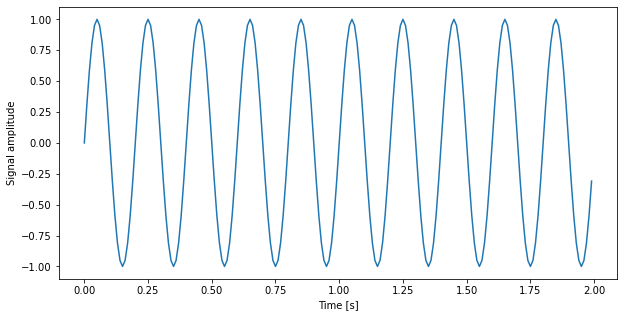

In [23]:
plt.rcParams["figure.figsize"] = (10,5)
f = 5  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

/home/jedota/miniconda3/envs/usach1/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(-5.0, 110.0)

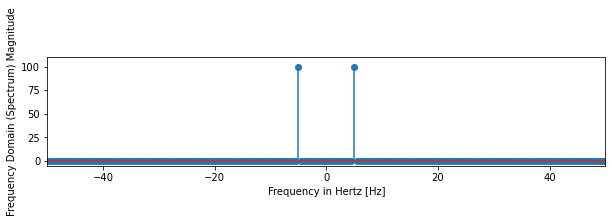

In [25]:
from scipy import fftpack
plt.rcParams["figure.figsize"] = (10,2)
X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

# FFT

FFT 
(Fast Fourier Transform) es un eficiente algoritmo
que permite calcular la transformada de Fourier discreta
(DFT) y su inversa.

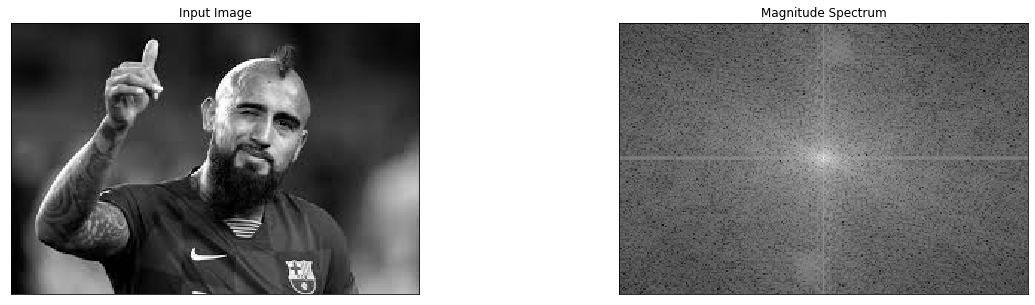

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

img = cv2.imread('vidal1.jpeg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

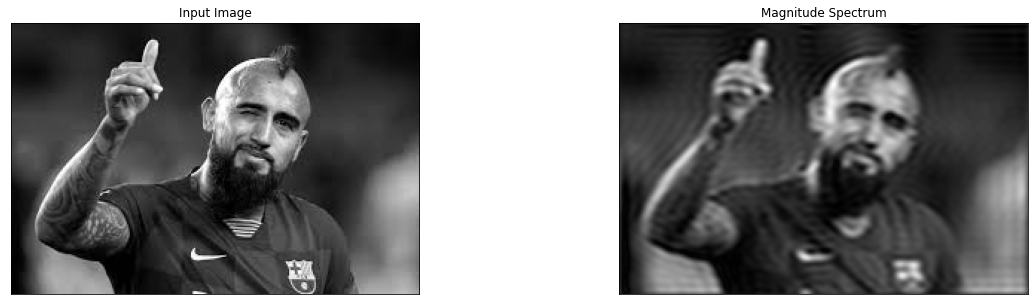

In [8]:
plt.rcParams["figure.figsize"] = (20,5)

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Rotar 90 grados

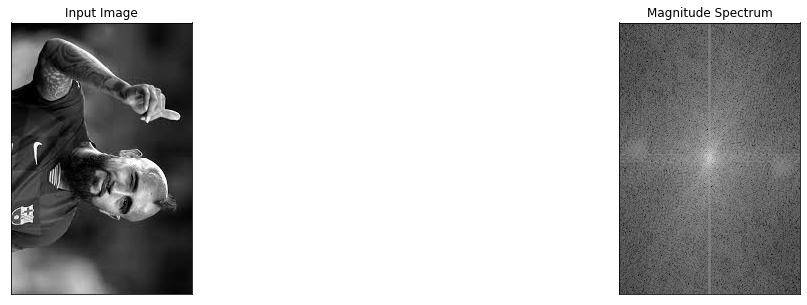

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

img = cv2.imread('vidal1.jpeg',0)
img_ro90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
f = np.fft.fft2(img_ro90)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))



plt.subplot(121),plt.imshow(img_ro90, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()




# Low Pass Filter(LPF)

Este filtro LPF remueve altas frecuencias

(183, 275)


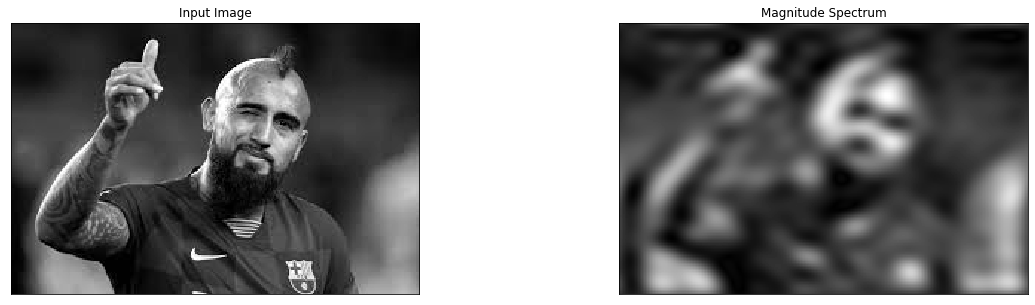

In [20]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

img = cv2.imread('vidal1.jpeg',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
print(img.shape)
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-10:crow+10, ccol-10:ccol+10] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.show()  

# High Pass Filter (HPF)

Este filtro remueve las bajas frecuencias

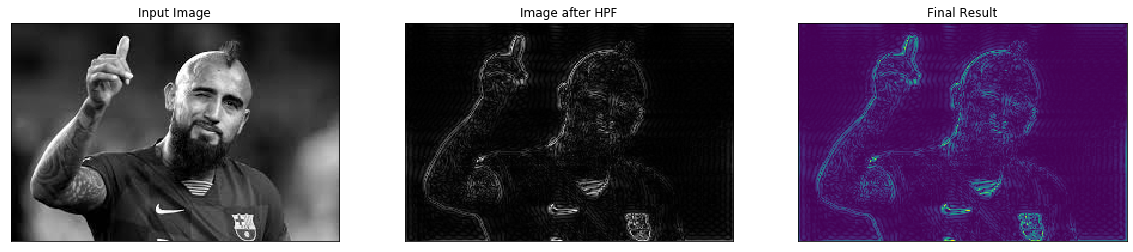

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

img = cv2.imread('vidal1.jpeg',0)

# fft to convert the image to freq domain 
f = np.fft.fft2(img)

# shift the center
fshift = np.fft.fftshift(f)

rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

# remove the low frequencies by masking with a rectangular window of size 60x60
# High Pass Filter (HPF)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

# shift back (we shifted the center before)
f_ishift = np.fft.ifftshift(fshift)

# inverse fft to get the image back 
img_back = np.fft.ifft2(f_ishift)

img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Final Result'), plt.xticks([]), plt.yticks([])

plt.show()

Si rotamos la función f(x,y) a un ángulo determinado, la
transformada también será afectada por una rotación del mismo
ángulo. Esta propiedad también se da a la inversa, es decir, si la
transformada se rota en un determinado ángulo, la transformada
inversa también se verá rotada ese mismo ángulo.

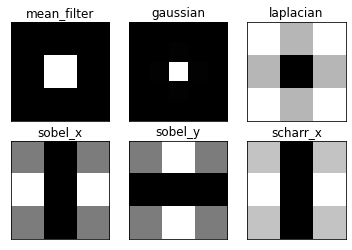

In [5]:
import cv2
import numpy as np
import sys
from matplotlib import pyplot as plt

# simple averaging filter without scaling parameter
mean_filter = np.ones((3,3))

# creating a guassian filter
x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

# different edge detecting filters
# scharr in x-direction
scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])
# sobel in x direction
sobel_x= np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])
# sobel in y direction
sobel_y= np.array([[-1,-2,-1],
                   [0, 0, 0],
                   [1, 2, 1]])
# laplacian
laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])

filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x', \
                'sobel_y', 'scharr_x']
fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
    plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])

plt.show()

Pasa Bajo. Deja pasar bajas frecuencias. Los bordes y transiciones bruscas como ruido contribuyen en el contenido de altas frecuencias.
Pasa Alto: El realce consiste en dejar pasar altas frecuencias.
Pasa Banda: Seleccionar los rangos de frecuencias que deseamos.